{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Practice your skills manipulating raster data using **rioxarray**. 
</div>


In [10]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr 
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [11]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Open And Plot Hillshade
 
It's time to practice your raster skills. Do the following:

Use the `pre_DTM_hill.tif` layer in the `colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar` directory.

1. Open the `pre_DTM_hill.tif` layer using rasterio.
2. Plot the data using `ep.plot_bands()`. 
3. Set the colormap (`cmap=`) parameter value to Greys: `cmap="gray"`

Give you plot a title.

</div>

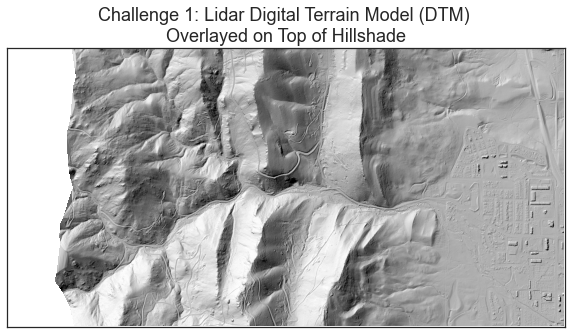

In [12]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM_hill.tif")
    
lidar_dtm_hill_xr = rxr.open_rasterio(dem_pre_path, 
                                       masked=True).squeeze()    

fig, ax = plt.subplots(figsize=(10,6))
ep.plot_bands(lidar_dtm_hill_xr,
              cmap="gray",
              ax=ax,
              cbar=False,
              title="Challenge 1: Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Overlay DTM Over DTM Hillshade

In the challenge above, you opened and plotted a hillshade of the 
lidar digital terrain model create from NEON lidar data before
the 2013 Colorado Flood. In this challenge, you will use the hillshade
to create a map that looks more 3-dimensional by overlaying the 
DTM data on top of the hillshade. 

To do this, you will need to plot each layer using `ep.plot_bands()`

1. Plot the hillshade layer `pre_DTM_hill.tif` that you opened in Challenge 1. Similar to Challenge one set `cmap="gray"`
2. Plot the DTM that you opened above `dtm_pre_arr`
  * When you plot the DTM, use the `alpha=` parameter to adjust the opacity of the DTM so that you can see the shading on the hillshade underneath the DTM. 
  * Set the colormap to viridis (or any colormap that you prefer) `cmap='viridis'` for the DTM layer. 


HINT: be sure to use the `ax=` parameter to make sure both 
layers are on the same figure. 

</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** 

* <a href="https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/overlay-raster-maps/" target="_blank">Check out this lesson on overlaying rasters if you get stuck trying to complete this challenge.</a>

* <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html" target="_blank">Check out the matplotlib colormap documentation for most on colormap options.</a>

</div>

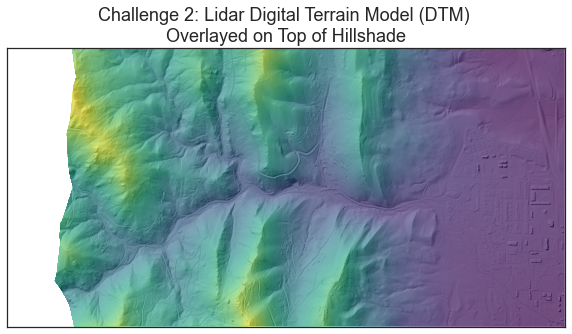

In [13]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")
    
dtm_pre_xr = rxr.open_rasterio(dem_pre_path, 
                                masked=True).squeeze()

fig, ax = plt.subplots(figsize=(10,6))

ep.plot_bands(lidar_dtm_hill_xr,
              cmap="gray",
              ax=ax,
              cbar=False,
              title="Challenge 2: Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade")
ep.plot_bands(dtm_pre_xr,
              alpha=.6,
              cbar=False,
              ax=ax,
              cmap='viridis')

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3: Add A Site Boundary to Your Raster Plot

Take all of the code that you wrote above to plot the DTM on top 
of your hillshade layer. Add the site boundary layer that you opened above 
`site_bound_shp` to your plot. 

HINT: remember that the `plotting_extent()` object (`lidar_dem_plot_ext`) 
will be needed to add this final layer to your plot.

</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Plotting Raster and Vector Together

You can learn more about overlaying vector data on top of raster data to 
create maps in Python in <a href="https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/plotting-extents/" >this lesson on setting plotting extents.</a>
</div>



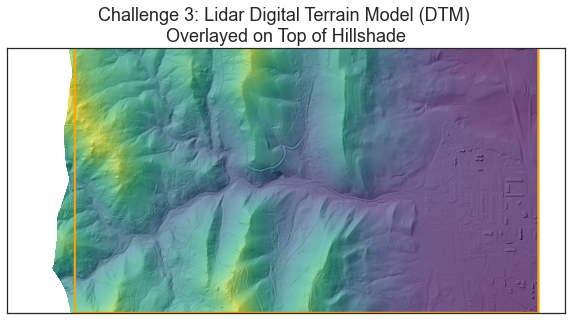

In [14]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)
    
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
lidar_dem_plot_ext = plotting_extent(dtm_pre_arr.values, 
                                     dtm_pre_arr.rio.transform())

fig, ax = plt.subplots(figsize=(10,6))
ep.plot_bands(lidar_dtm_hill_xr,
              cmap="gray",
              ax=ax,
              cbar=False,
              # alpha=.5,
              extent=lidar_dem_plot_ext,
              title="Challenge 3: Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade")
ep.plot_bands(dtm_pre_arr,
              alpha=.6,
              cbar=False,
              ax=ax,
              cmap='viridis',
              extent=lidar_dem_plot_ext)

site_bound_shp.plot(color='None',
                    edgecolor='orange',
                    linewidth=2,
                    ax=ax)
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4 (Optional): Subtract Rasters

If you have two numpy arrays that are the same shape (same columns and rows) and the 
original data were in the same coordinate reference system, you can subtract the 
two datasets to calculate the difference - like this: 

`difference_raster = raster_array_one - raster_array_two`

Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected
before the 2013 flood. In the post-flood directory, you will find a DTM containing 
data collected after the 2013 flood. Subtract the DTM_pre_flood from the DTM_post_flood:

`difference = dtm_pre_flood - dtm_post_flood`

Plot the output difference array using **earthpy** `plot_bands()`.


```python

# Define relative path to post flood data
dem_post_path = os.path.join("colorado-flood", 
                             "spatial",
                              "boulder-leehill-rd", 
                              "post-flood", 
                              "lidar",
                              "post_DTM.tif")

```
</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Subtract Rasters

Learn more  <a href="http://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/subtract-rasters-in-python/" >about subtracting raster data in this earthdatascience.org lesson.</a>
</div>


In [6]:
# Answer - hiding this for now as for this plot to look nice you really need to classify it or adjust bins
# dem_post_path = os.path.join("colorado-flood",
#                              "spatial",
#                              "boulder-leehill-rd",
#                              "post-flood",
#                              "lidar",
#                              "post_DTM.tif")

# with rio.open(dem_post_path) as dem_src:
#     dtm_post_arr = dem_src.read(1, masked=True)

# dtm_diff = dtm_pre_arr - dtm_post_arr


# ep.plot_bands(dtm_diff,
#               cmap="viridis",
#               title="Challenge 4 Plot: Difference Digital Terrain Model")
# plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4 (Optional): Open Post Flood Raster 


Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected
before the 2013 flood. In the post-flood directory, you will find a DTM containing 
data collected after the 2013 flood. 

Create a figure with two plots.

In the first subplot, plot the pre-flood data that you opened above.
In the second subplot, open and plot the post-flood DTM data. You wil
find the file `post_DTM.tif` in the post-flood directory of your 
colorado-flood dataset downloaded using earthpy. 

* Add a super title (a title for the entire figure) using `plt.suptitle("Title Here")`
* Adjust the location of your suptitle `plt.tight_layout(rect=[0, 0.03, 1, 0.9])`



</div>

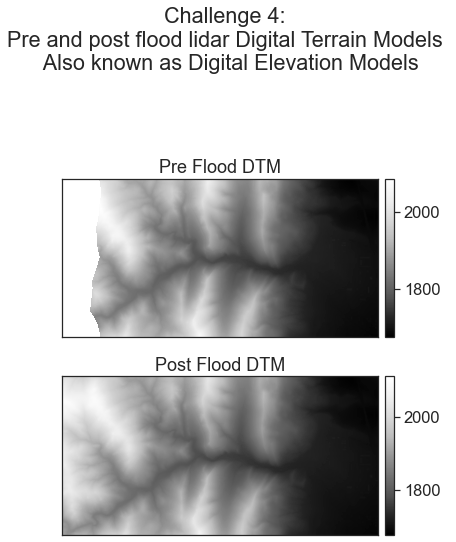

In [15]:
# Define relative path to file
dem_post_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "post-flood",
                             "lidar",
                             "post_DTM.tif")
    
dtm_post_xr = rxr.open_rasterio(dem_post_path, 
                                  masked=True).squeeze()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plt.suptitle(
    "Challenge 4: \nPre and post flood lidar Digital Terrain Models \n Also known as Digital Elevation Models")

ep.plot_bands(dtm_pre_xr,
              ax=ax1,
              title="Pre Flood DTM")

ep.plot_bands(dtm_post_xr,
              ax=ax2,
              title="Post Flood DTM")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

# TODO -- move this to the plotting chapter?? 
## Adjust Plot Extent to "Zoom in" on Your Raster Data

If you want to quickly zoom in on a portion of your raster data, you can adjust the x and y 
spatial extents of your matplotlib plot. To do this, you will create a new spatial extent that is smaller than the 
original spatial extent of the data. 


In [8]:
# Define a spatial extent that is "smaller"
# minx, miny, maxx, maxy, ccw=True
zoomed_extent = [472500, 4434000, 473030, 4435030]

Next you'll define a box which you'll focus on. You've provided a small helper function that lets you give the x and y limits of a box, and it returns the `x,y` points corresponding to four corners of this box. It then returns a `shapely` polygon object.

In [9]:
# # Turn extent into geodataframe
# zoom_ext_gdf = gpd.GeoDataFrame()
# zoom_ext_gdf.loc[0, 'geometry'] = box(*zoomed_extent)

In [10]:
# # Plot the original data with the boundary box
# fig, ax = plt.subplots(figsize=(8, 3))

# ep.plot_bands(lidar_dem_im,
#               extent=spatial_extent,
#               title="Lidar Raster Full Spatial Extent w Zoom Box Overlayed",
#               ax=ax,
#               scale=False)

# zoom_ext_gdf.plot(ax=ax)

# ax.set_axis_off()

In [11]:
# # Plot the data but set the x and y lim
# fig, ax = plt.subplots(figsize=(8, 3))

# ep.plot_bands(lidar_dem_im,
#               extent=spatial_extent,
#               title="Lidar Raster Zoomed on a Smaller Spatial Extent",
#               ax=ax,
#               scale=False)

# # Set x and y limits of the plot
# ax.set_xlim(zoomed_extent[0], zoomed_extent[2])
# ax.set_ylim(zoomed_extent[1], zoomed_extent[3])

# ax.set_axis_off()
# plt.show()